# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, kaggle [superstore](https://www.kaggle.com/datasets/roopacalistus/superstore).
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Terdapat 9994 baris dan 13 kolom.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya Ship Mode, Segment, Region, Category, Sub-Category.
     - *Numerikal*: Misalnya Sales, Quantity, Discount, Profit.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
superstore = pd.read_csv('clustering_superstore.csv')
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
superstore.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
superstore[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
superstore['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
print(f"Dataset memiliki {superstore.shape[0]} baris dan {superstore.shape[1]} kolom.")

Dataset memiliki 9994 baris dan 13 kolom.


In [10]:
print("Informasi Tipe Data:")
print(superstore.dtypes)

Informasi Tipe Data:
Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [11]:
print("Jumlah Missing Values per Kolom:")
print(superstore.isnull().sum())

Jumlah Missing Values per Kolom:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [12]:
missing_percentage = superstore.isnull().sum() / len(superstore) * 100
print("Persentase Missing Values per Kolom:")
print(missing_percentage[missing_percentage > 0])

Persentase Missing Values per Kolom:
Series([], dtype: float64)


In [13]:
print(f"Jumlah Data Duplikat: {superstore.duplicated().sum()}")

Jumlah Data Duplikat: 17


In [14]:
print("Statistik Deskriptif untuk Fitur Numerik:")
print(superstore[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

Statistik Deskriptif untuk Fitur Numerik:
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


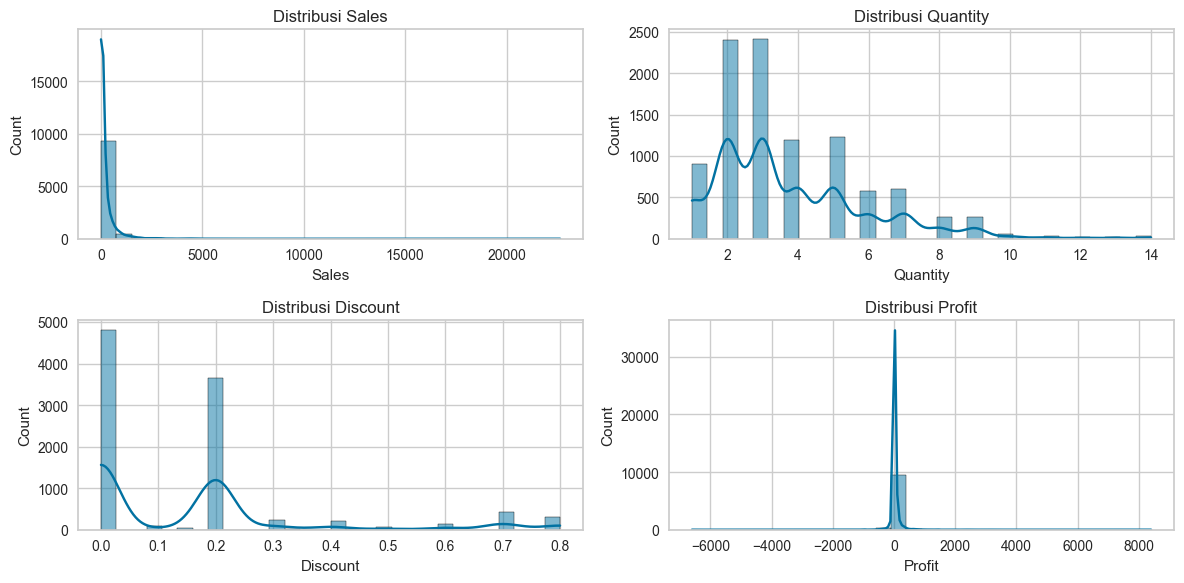

In [15]:
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(superstore[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

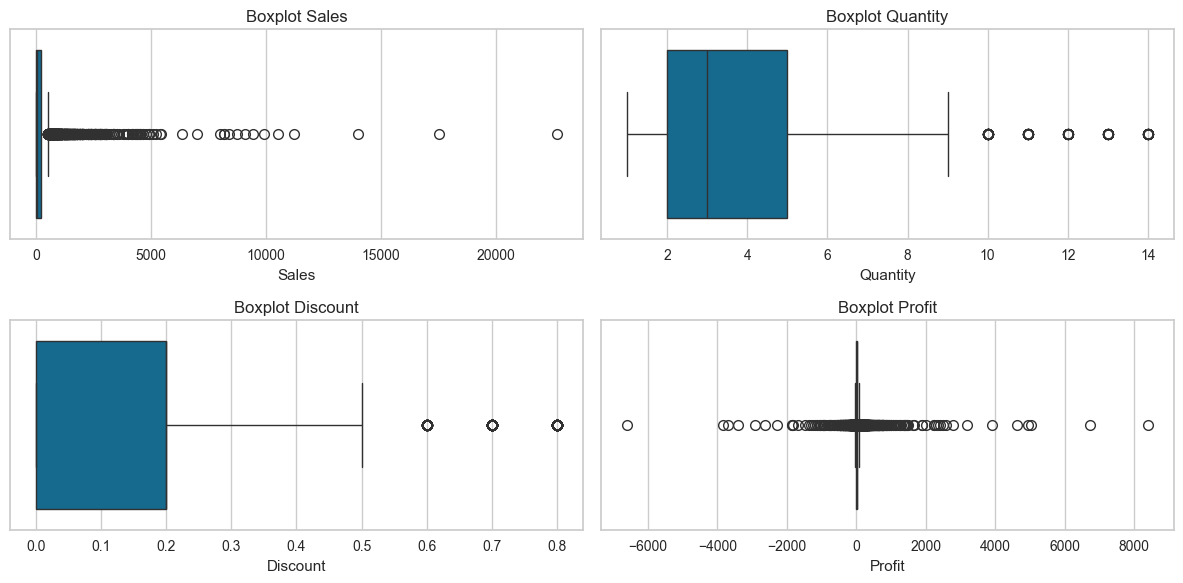

In [16]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=superstore[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

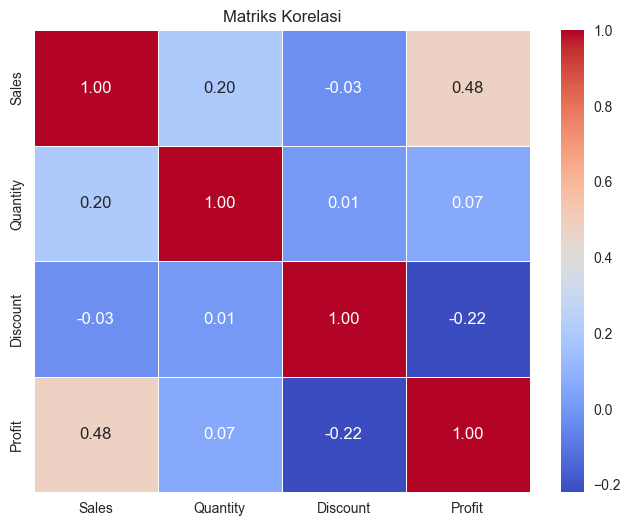

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(superstore[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

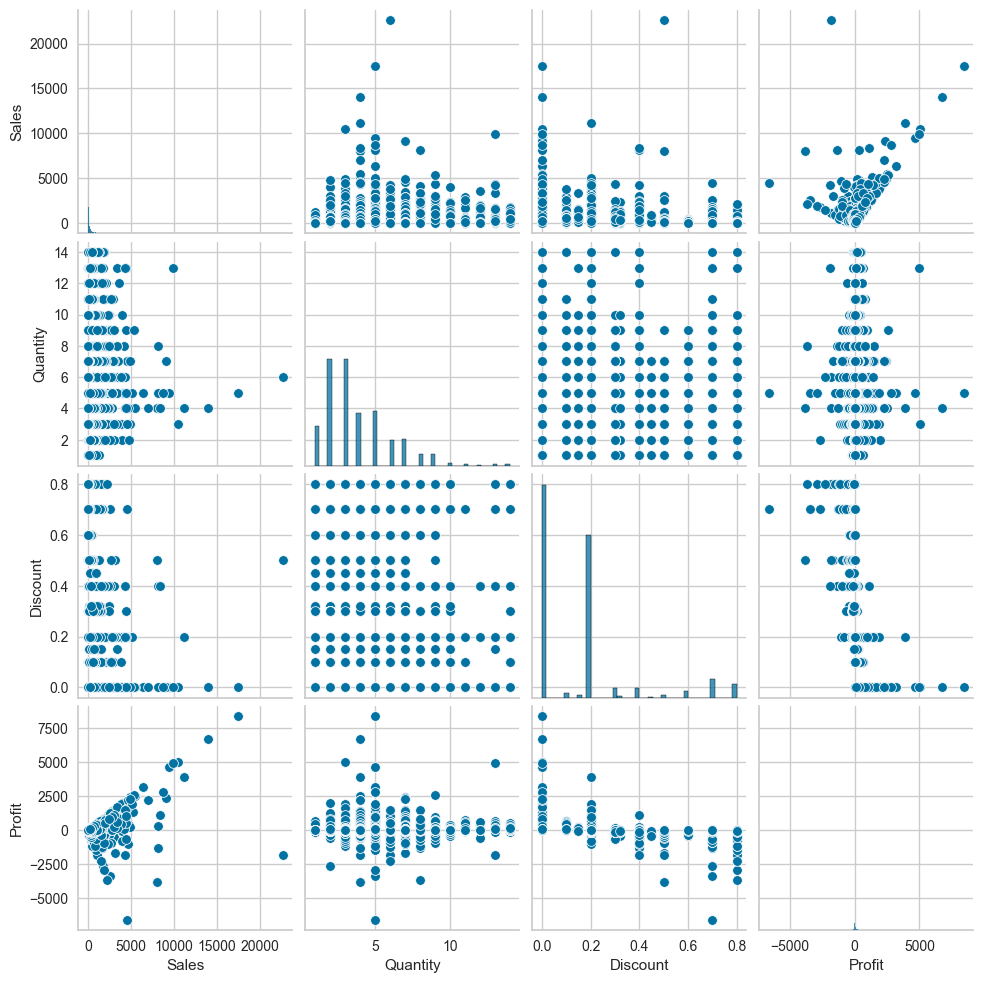

In [18]:
sns.pairplot(superstore[numerical_columns])
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18672\1697552516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=superstore['Segment'], palette='pastel')


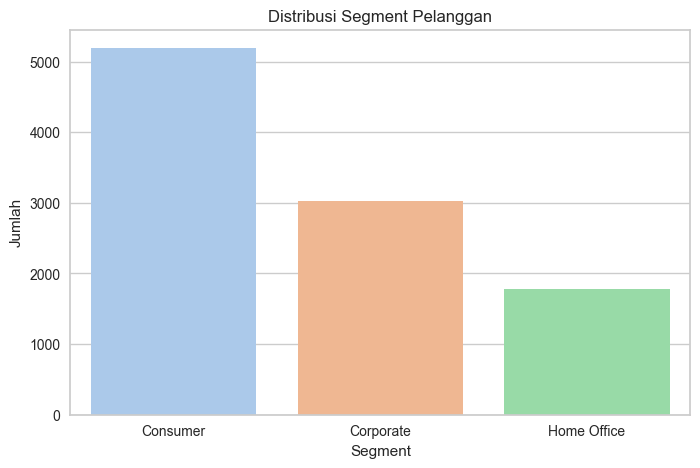

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=superstore['Segment'], palette='pastel')
plt.title("Distribusi Segment Pelanggan")
plt.xlabel("Segment")
plt.ylabel("Jumlah")
plt.show()

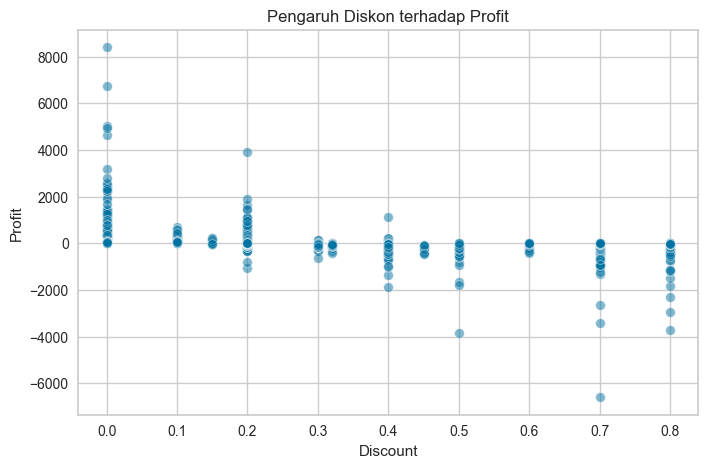

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=superstore['Discount'], y=superstore['Profit'], alpha=0.5)
plt.title("Pengaruh Diskon terhadap Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

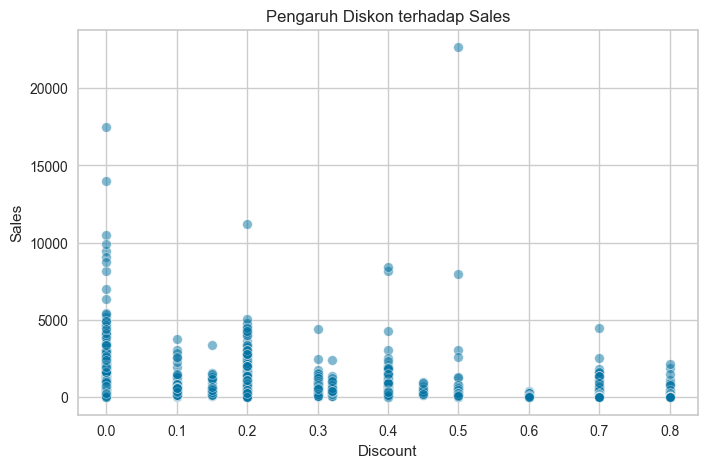

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=superstore['Discount'], y=superstore['Sales'], alpha=0.5)
plt.title("Pengaruh Diskon terhadap Sales")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18672\4192277914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=superstore['Segment'], y=superstore['Profit'], palette='coolwarm')


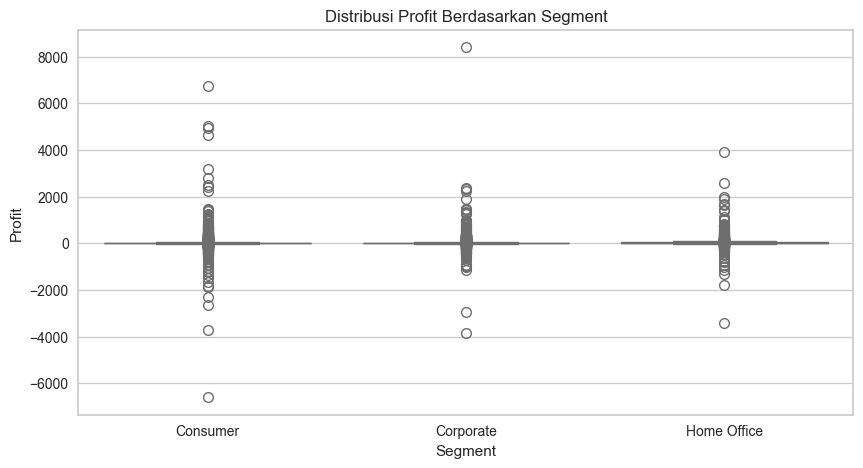

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=superstore['Segment'], y=superstore['Profit'], palette='coolwarm')
plt.title("Distribusi Profit Berdasarkan Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [23]:
superstore_clean = superstore.copy()
superstore_clean.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
print("Jumlah Missing Values per Kolom:")
print(superstore_clean.isnull().sum())

Jumlah Missing Values per Kolom:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [25]:
print(f"Jumlah Data Duplikat Sebelum Dihapus: {superstore_clean.duplicated().sum()}")
superstore_clean.drop_duplicates(inplace=True)
print(f"Jumlah Data Duplikat Setelah Dihapus: {superstore_clean.duplicated().sum()}")

Jumlah Data Duplikat Sebelum Dihapus: 17
Jumlah Data Duplikat Setelah Dihapus: 0


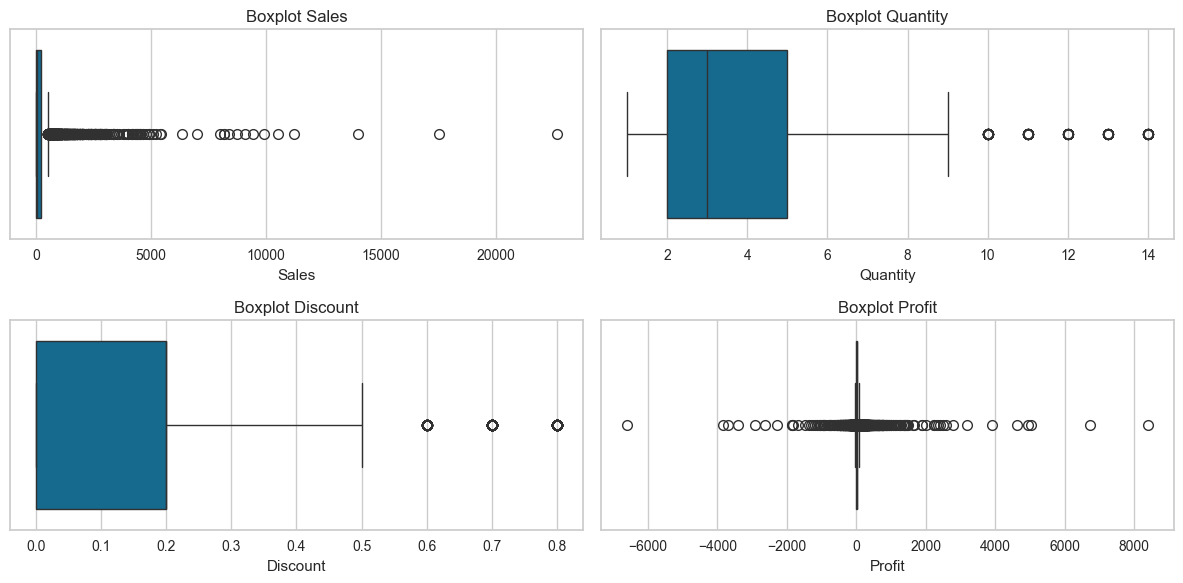

In [26]:
plt.figure(figsize=(12, 6))
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=superstore_clean[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [43]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 
    return df

superstore_clean = remove_outliers(superstore_clean, numerical_columns)
print(f"Jumlah Data Setelah Menghapus Outlier: {superstore_clean.shape[0]} baris")

Jumlah Data Setelah Menghapus Outlier: 4104 baris


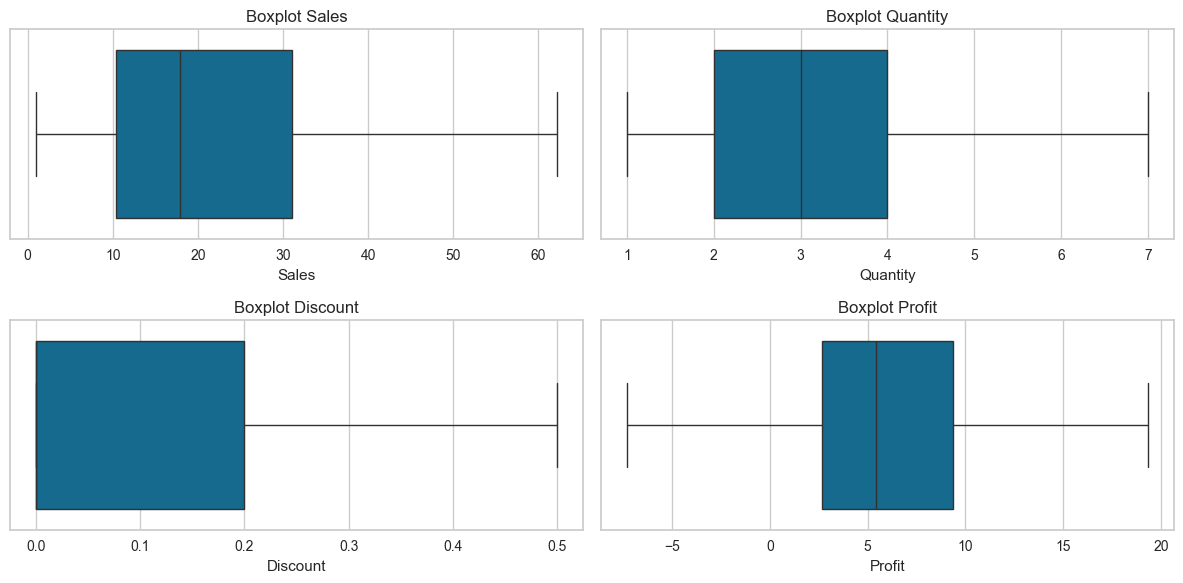

In [45]:
plt.figure(figsize=(12, 6))
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=superstore_clean[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [46]:
print("Data sebelum Normalisasi (MinMaxScaler):")
print(superstore_clean[numerical_columns].head())

scaler = MinMaxScaler()
superstore_clean[numerical_columns] = scaler.fit_transform(superstore_clean[numerical_columns])
print("Data setelah Normalisasi (MinMaxScaler):")
print(superstore_clean[numerical_columns].head())

Data sebelum Normalisasi (MinMaxScaler):
    Sales  Quantity  Discount   Profit
2  14.620         2       0.0   6.8714
4  22.368         2       0.2   2.5164
5  48.860         7       0.0  14.1694
6   7.280         4       0.0   1.9656
8  18.504         3       0.2   5.7825
Data setelah Normalisasi (MinMaxScaler):
      Sales  Quantity  Discount    Profit
2  0.222749  0.166667       0.0  0.532158
4  0.349371  0.166667       0.4  0.368638
5  0.782317  1.000000       0.0  0.806180
6  0.102795  0.500000       0.0  0.347957
8  0.286223  0.333333       0.4  0.491272


In [47]:
label_encoder = LabelEncoder()
superstore_clean['Segment'] = label_encoder.fit_transform(superstore_clean['Segment'])
print("Segment Setelah Encoding:")
print(superstore_clean['Segment'].value_counts())

Segment Setelah Encoding:
Segment
0    2134
1    1227
2     743
Name: count, dtype: int64


In [48]:
superstore_clean['Sales_Bin'] = pd.cut(superstore_clean['Sales'], bins=3, labels=["Low", "Medium", "High"])
print("Distribusi Sales Setelah Binning:")
print(superstore_clean['Sales_Bin'].value_counts())

Distribusi Sales Setelah Binning:
Sales_Bin
Low       2403
Medium    1229
High       472
Name: count, dtype: int64


In [49]:
print("Informasi Dataset Setelah Preprocessing:")
print(superstore_clean.info())

Informasi Dataset Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 4104 entries, 2 to 9992
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     4104 non-null   object  
 1   Segment       4104 non-null   int64   
 2   Country       4104 non-null   object  
 3   City          4104 non-null   object  
 4   State         4104 non-null   object  
 5   Postal Code   4104 non-null   int64   
 6   Region        4104 non-null   object  
 7   Category      4104 non-null   object  
 8   Sub-Category  4104 non-null   object  
 9   Sales         4104 non-null   float64 
 10  Quantity      4104 non-null   float64 
 11  Discount      4104 non-null   float64 
 12  Profit        4104 non-null   float64 
 13  Sales_Bin     4104 non-null   category
dtypes: category(1), float64(4), int64(2), object(7)
memory usage: 453.0+ KB
None


  # **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [50]:
selected_features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Segment']
X = superstore_clean[selected_features]
X

,Sales,Quantity,Discount,Profit,Segment
2,0.222749,0.166667,0.0,0.532158,1
4,0.349371,0.166667,0.4,0.368638,0
5,0.782317,1.000000,0.0,0.806180,0
6,0.102795,0.500000,0.0,0.347957,0
8,0.286223,0.333333,0.4,0.491272,0
...,...,...,...,...,...
9982,0.564962,1.000000,0.0,0.901693,0
9985,0.892466,0.500000,0.0,0.879570,0
9986,0.576075,0.000000,0.0,0.845657,0
9989,0.396437,0.333333,0.4,0.428203,0


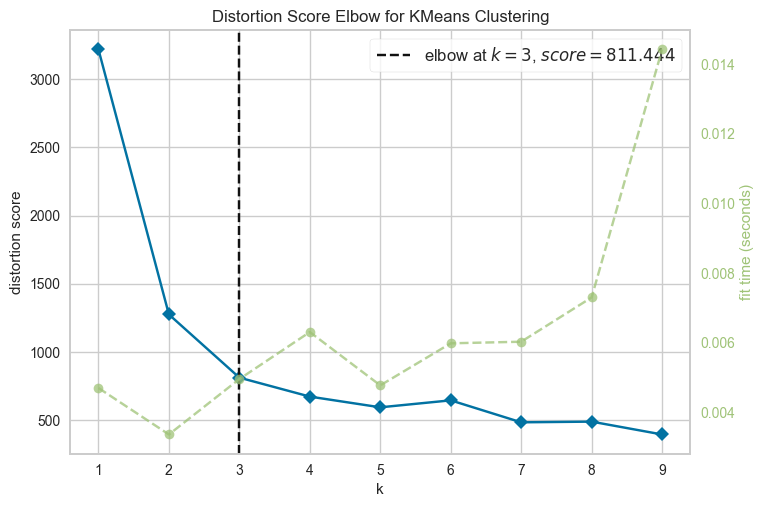

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(X)
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [55]:
optimal_clusters = visualizer.elbow_value_
optimal_clusters

np.int64(3)

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=30)
superstore_clean['Cluster'] = kmeans.fit_predict(X)
superstore_clean

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster
2,Second Class,1,United States,Los Angeles,California,90036,West,Office Supplies,Labels,0.222749,0.166667,0.0,0.532158,Low,1
4,Standard Class,0,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,0.349371,0.166667,0.4,0.368638,Medium,0
5,Standard Class,0,United States,Los Angeles,California,90032,West,Furniture,Furnishings,0.782317,1.000000,0.0,0.806180,High,0
6,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Art,0.102795,0.500000,0.0,0.347957,Low,0
8,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Binders,0.286223,0.333333,0.4,0.491272,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,0,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,0.564962,1.000000,0.0,0.901693,Medium,0
9985,Standard Class,0,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,0.892466,0.500000,0.0,0.879570,High,0
9986,Standard Class,0,United States,Los Angeles,California,90008,West,Technology,Accessories,0.576075,0.000000,0.0,0.845657,Medium,0
9989,Second Class,0,United States,Miami,Florida,33180,South,Furniture,Furnishings,0.396437,0.333333,0.4,0.428203,Medium,0


In [64]:
silhouette_avg = silhouette_score(X, superstore_clean['Cluster'])
print(f'Silhouette Score untuk {optimal_clusters} Cluster: {silhouette_avg:.4f}')

Silhouette Score untuk 3 Cluster: 0.5115


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [65]:
selector_strict = VarianceThreshold(threshold=0.05) 
df_strict_filtered = selector_strict.fit_transform(superstore_clean[selected_features])
print("Jumlah Fitur Setelah Variance Threshold:", df_strict_filtered.shape[1])

clusters = kmeans.fit_predict(df_strict_filtered)
silhouette_var_strict = silhouette_score(df_strict_filtered, clusters)

print(f"Silhouette Score Sebelum Variance Thresholding : {silhouette_avg:.4f}")
print(f"Silhouette Score Setelah Variance Thresholding : {silhouette_var_strict:.4f}")


Jumlah Fitur Setelah Variance Threshold: 3
Silhouette Score Sebelum Variance Thresholding : 0.5115
Silhouette Score Setelah Variance Thresholding : 0.6166


In [66]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(superstore_clean[selected_features])

clusters = kmeans.fit_predict(df_pca)
silhouette_pca = silhouette_score(df_pca, clusters)

print(f'Silhouette Score Sebelum PCA: {silhouette_avg:.4f}')
print(f"Silhouette Score Setelah PCA: {silhouette_pca:.4f}")

Silhouette Score Sebelum PCA: 0.5115
Silhouette Score Setelah PCA: 0.6821


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [67]:
superstore_features = superstore_clean.copy()
superstore_features.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster
2,Second Class,1,United States,Los Angeles,California,90036,West,Office Supplies,Labels,0.222749,0.166667,0.0,0.532158,Low,1
4,Standard Class,0,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,0.349371,0.166667,0.4,0.368638,Medium,0
5,Standard Class,0,United States,Los Angeles,California,90032,West,Furniture,Furnishings,0.782317,1.000000,0.0,0.806180,High,0
6,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Art,0.102795,0.500000,0.0,0.347957,Low,0
8,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Binders,0.286223,0.333333,0.4,0.491272,Low,0


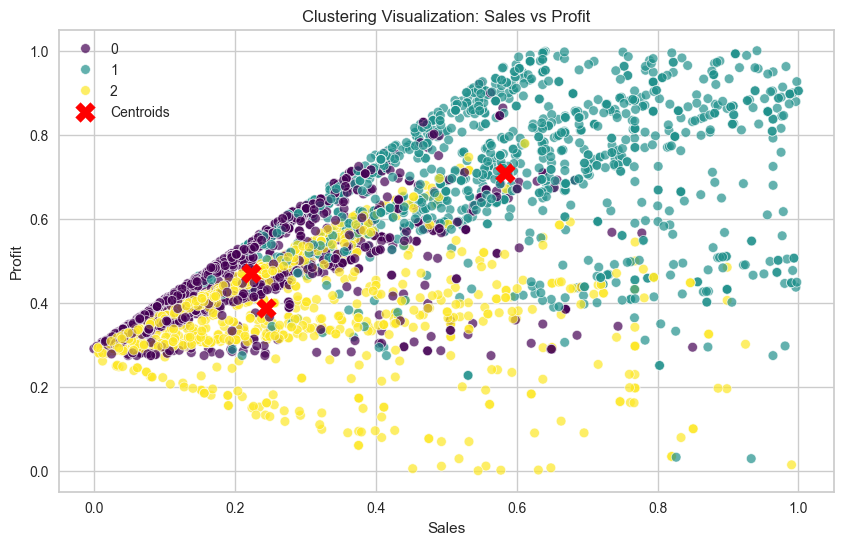

In [69]:
features_original = ['Sales', 'Quantity', 'Discount', 'Profit']  
clusters_original = kmeans.fit_predict(superstore_features[features_original])

x_feature = 'Sales'
y_feature = 'Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_features, x=x_feature, y=y_feature, hue=clusters_original, palette="viridis", alpha=0.7)

centroids_original = kmeans.cluster_centers_
plt.scatter(
    centroids_original[:, features_original.index(x_feature)], 
    centroids_original[:, features_original.index(y_feature)], 
    c='red', s=200, marker='X', label='Centroids'
)

plt.title(f'Clustering Visualization: {x_feature} vs {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.show()

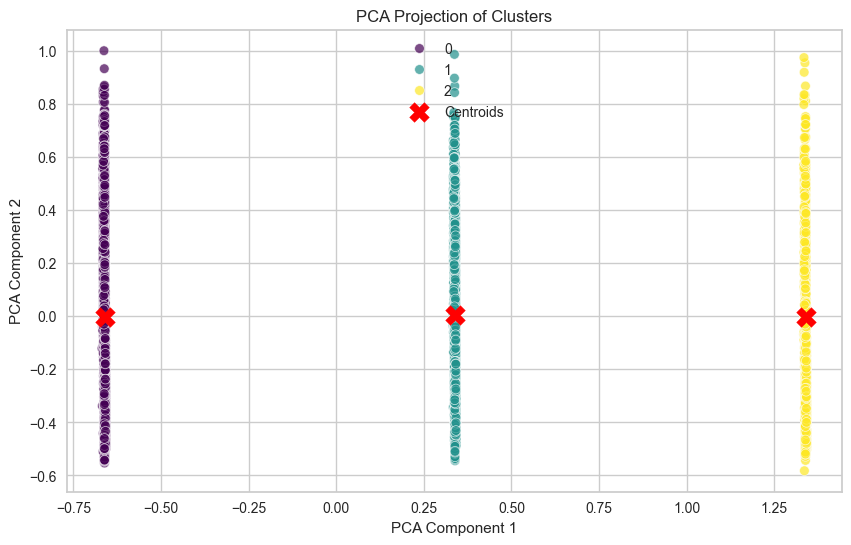

In [70]:
pca = PCA(n_components=2)
df_pca_visual = pca.fit_transform(superstore_features[selected_features])

clusters = kmeans.fit_predict(df_pca_visual)  

pca_centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_visual[:, 0], y=df_pca_visual[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


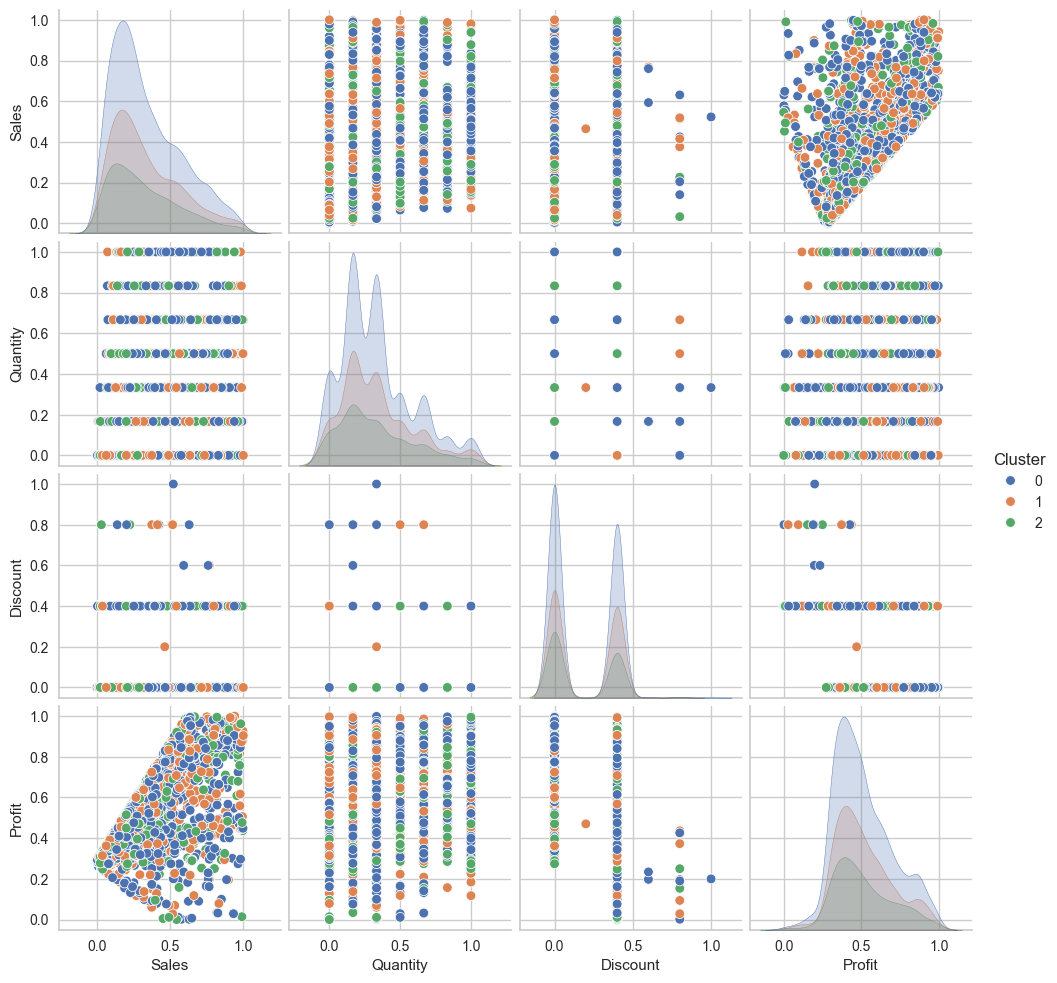

In [71]:
superstore_features['Cluster'] = clusters

sns.pairplot(superstore_features, hue='Cluster', vars=['Sales', 'Quantity', 'Discount', 'Profit'], palette="deep")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [72]:
superstore_clustering = superstore_clean.copy()
superstore_clustering.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster
2,Second Class,1,United States,Los Angeles,California,90036,West,Office Supplies,Labels,0.222749,0.166667,0.0,0.532158,Low,1
4,Standard Class,0,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,0.349371,0.166667,0.4,0.368638,Medium,0
5,Standard Class,0,United States,Los Angeles,California,90032,West,Furniture,Furnishings,0.782317,1.000000,0.0,0.806180,High,0
6,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Art,0.102795,0.500000,0.0,0.347957,Low,0
8,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Binders,0.286223,0.333333,0.4,0.491272,Low,0


In [73]:
superstore_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4104 entries, 2 to 9992
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     4104 non-null   object  
 1   Segment       4104 non-null   int64   
 2   Country       4104 non-null   object  
 3   City          4104 non-null   object  
 4   State         4104 non-null   object  
 5   Postal Code   4104 non-null   int64   
 6   Region        4104 non-null   object  
 7   Category      4104 non-null   object  
 8   Sub-Category  4104 non-null   object  
 9   Sales         4104 non-null   float64 
 10  Quantity      4104 non-null   float64 
 11  Discount      4104 non-null   float64 
 12  Profit        4104 non-null   float64 
 13  Sales_Bin     4104 non-null   category
 14  Cluster       4104 non-null   int32   
dtypes: category(1), float64(4), int32(1), int64(2), object(7)
memory usage: 469.0+ KB


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [74]:
superstore_clustering['Segment'] = label_encoder.inverse_transform(superstore_clustering['Segment'])
superstore_clustering.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,0.222749,0.166667,0.0,0.532158,Low,1
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,0.349371,0.166667,0.4,0.368638,Medium,0
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,0.782317,1.000000,0.0,0.806180,High,0
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,0.102795,0.500000,0.0,0.347957,Low,0
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,0.286223,0.333333,0.4,0.491272,Low,0


In [75]:
superstore_clustering['Cluster'].value_counts()

Cluster
0    2134
1    1227
2     743
Name: count, dtype: int64

In [76]:
numerical = ['Sales', 'Quantity', 'Discount', 'Profit']
superstore_clustering[numerical].head()

,Sales,Quantity,Discount,Profit
2,0.222749,0.166667,0.0,0.532158
4,0.349371,0.166667,0.4,0.368638
5,0.782317,1.000000,0.0,0.806180
6,0.102795,0.500000,0.0,0.347957
8,0.286223,0.333333,0.4,0.491272


In [77]:
superstore_clustering[numerical] = scaler.inverse_transform(superstore_clustering[numerical])
superstore_clustering[numerical].head()

,Sales,Quantity,Discount,Profit
2,14.620,2.0,0.0,6.8714
4,22.368,2.0,0.2,2.5164
5,48.860,7.0,0.0,14.1694
6,7.280,4.0,0.0,1.9656
8,18.504,3.0,0.2,5.7825


In [78]:
cluster_labels = {
    0: "Transaksi Menengah",  
    1: "Transaksi Rendah",     
    2: "Transaksi Tinggi"      
}

superstore_clustering['Cluster_Label'] = superstore_clustering['Cluster'].map(cluster_labels)

superstore_clustering


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster,Cluster_Label
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2.0,0.0,6.8714,Low,1,Transaksi Rendah
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2.0,0.2,2.5164,Medium,0,Transaksi Menengah
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7.0,0.0,14.1694,High,0,Transaksi Menengah
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4.0,0.0,1.9656,Low,0,Transaksi Menengah
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3.0,0.2,5.7825,Low,0,Transaksi Menengah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7.0,0.0,16.7132,Medium,0,Transaksi Menengah
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4.0,0.0,16.1240,High,0,Transaksi Menengah
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1.0,0.0,15.2208,Medium,0,Transaksi Menengah
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3.0,0.2,4.1028,Medium,0,Transaksi Menengah


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [79]:
superstore_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4104 entries, 2 to 9992
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Ship Mode      4104 non-null   object  
 1   Segment        4104 non-null   object  
 2   Country        4104 non-null   object  
 3   City           4104 non-null   object  
 4   State          4104 non-null   object  
 5   Postal Code    4104 non-null   int64   
 6   Region         4104 non-null   object  
 7   Category       4104 non-null   object  
 8   Sub-Category   4104 non-null   object  
 9   Sales          4104 non-null   float64 
 10  Quantity       4104 non-null   float64 
 11  Discount       4104 non-null   float64 
 12  Profit         4104 non-null   float64 
 13  Sales_Bin      4104 non-null   category
 14  Cluster        4104 non-null   int32   
 15  Cluster_Label  4104 non-null   object  
dtypes: category(1), float64(4), int32(1), int64(1), object(9)
memory usage: 501.1+ KB


In [80]:
superstore_clustering.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Cluster
count,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000
mean,54966.936891,21.725903,3.018762,0.089815,6.367832,0.661062
std,32857.460331,14.414114,1.552522,0.100782,4.967237,0.765694
min,1453.000000,0.990000,1.000000,0.000000,-7.301500,0.000000
25%,21215.000000,10.368000,2.000000,0.000000,2.687250,0.000000
50%,55044.000000,17.940000,3.000000,0.000000,5.433200,0.000000
75%,90036.000000,31.108000,4.000000,0.200000,9.350800,1.000000
max,99301.000000,62.180000,7.000000,0.500000,19.331400,2.000000


In [81]:
agg_numeric = superstore_clustering.groupby("Cluster_Label").agg({
    "Sales": ["min", "max", "mean",],
    "Quantity": ["min", "max", "mean",],
    "Discount": ["min", "max", "mean",],
    "Profit": ["min", "max", "mean",]
})

agg_categorical = superstore_clustering.groupby("Cluster_Label")["Segment"].agg(lambda x: x.mode()[0])

agg_result = pd.concat([agg_numeric, agg_categorical], axis=1)

agg_result

,"(Sales, min)","(Sales, max)","(Sales, mean)","(Quantity, min)","(Quantity, max)","(Quantity, mean)","(Discount, min)","(Discount, max)","(Discount, mean)","(Profit, min)","(Profit, max)","(Profit, mean)",Segment
Cluster_Label,,,,,,,,,,,,,
Transaksi Menengah,1.240,62.18,21.848773,1.0,7.0,3.011715,0.0,0.5,0.090909,-7.2672,19.2960,6.337333,Consumer
Transaksi Rendah,1.344,62.18,21.815998,1.0,7.0,3.048900,0.0,0.4,0.092747,-6.5400,19.3314,6.417641,Corporate
Transaksi Tinggi,0.990,61.96,21.224221,1.0,7.0,2.989233,0.0,0.4,0.081830,-7.3015,19.2556,6.373177,Home Office


In [82]:
# Melihat ringkasan statistik tiap cluster
cluster_summary = superstore_clustering.groupby('Cluster')[['Sales', 'Quantity', 'Discount', 'Profit']].mean()
cluster_summary

,Sales,Quantity,Discount,Profit
Cluster,,,,
0,21.848773,3.011715,0.090909,6.337333
1,21.815998,3.048900,0.092747,6.417641
2,21.224221,2.989233,0.081830,6.373177


In [83]:
# Melihat ringkasan statistik tiap cluster
cluster_summary = superstore_clustering.groupby('Cluster_Label')[['Sales', 'Quantity', 'Discount', 'Profit']].mean()
cluster_summary

,Sales,Quantity,Discount,Profit
Cluster_Label,,,,
Transaksi Menengah,21.848773,3.011715,0.090909,6.337333
Transaksi Rendah,21.815998,3.048900,0.092747,6.417641
Transaksi Tinggi,21.224221,2.989233,0.081830,6.373177


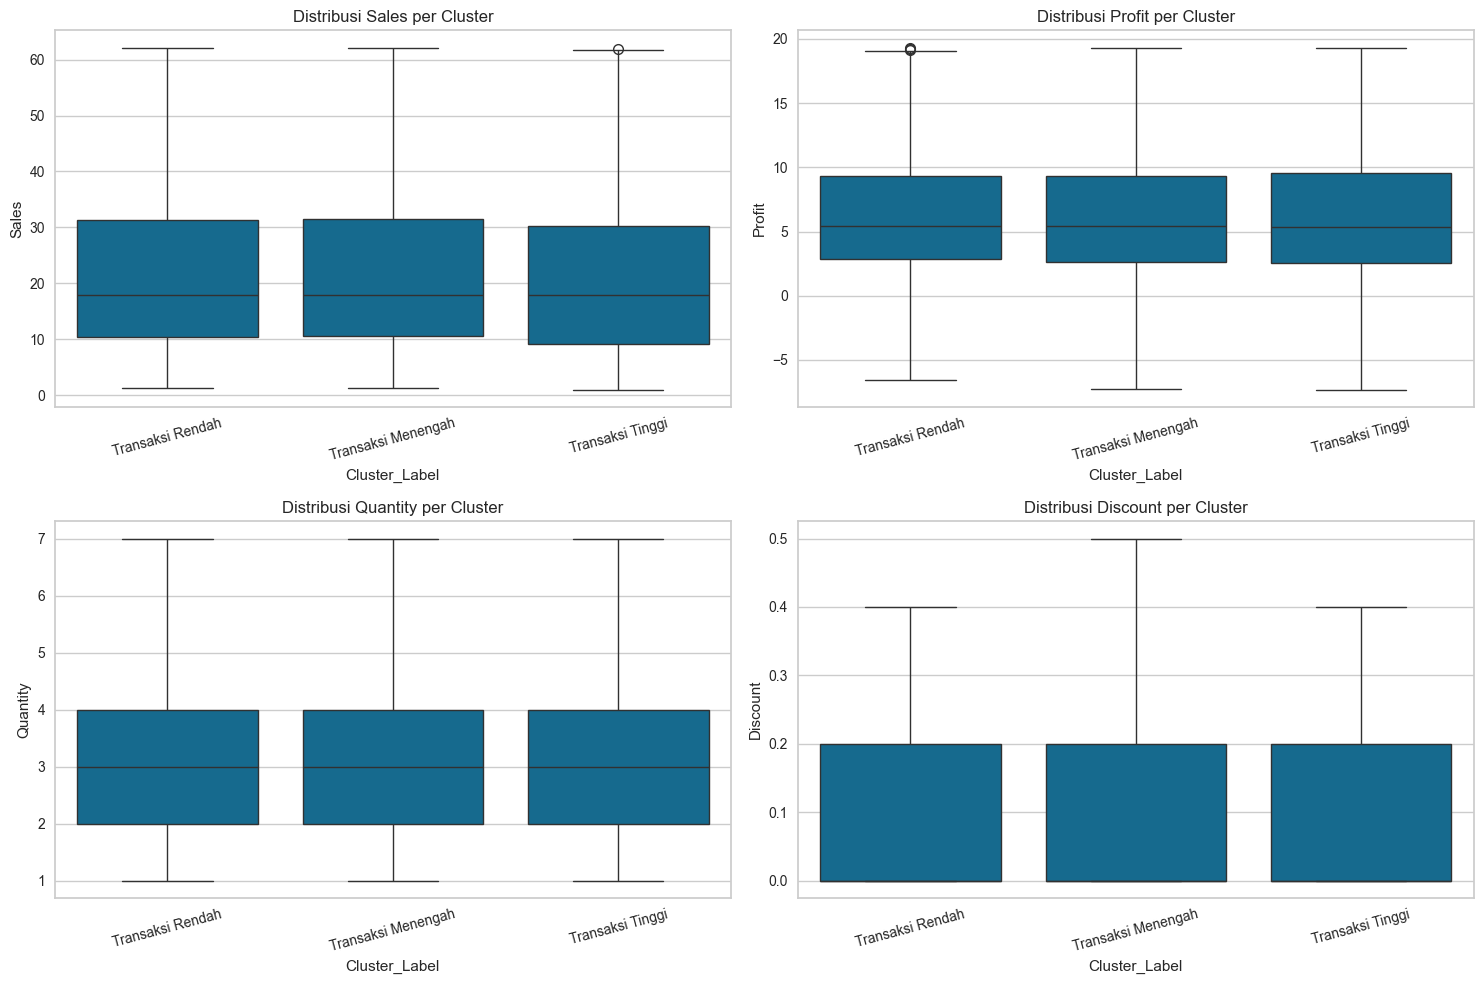

In [84]:
plt.figure(figsize=(15, 10))

features = ['Sales', 'Profit', 'Quantity', 'Discount']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=superstore_clustering, x='Cluster_Label', y=feature)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

In [85]:
segment_counts = superstore_clustering.groupby("Cluster_Label")["Segment"].value_counts(normalize=True).unstack()
print("Proporsi Segmentasi Pelanggan dalam Tiap Cluster:")
print(segment_counts)

Proporsi Segmentasi Pelanggan dalam Tiap Cluster:
Segment             Consumer  Corporate  Home Office
Cluster_Label                                       
Transaksi Menengah       1.0        NaN          NaN
Transaksi Rendah         NaN        1.0          NaN
Transaksi Tinggi         NaN        NaN          1.0


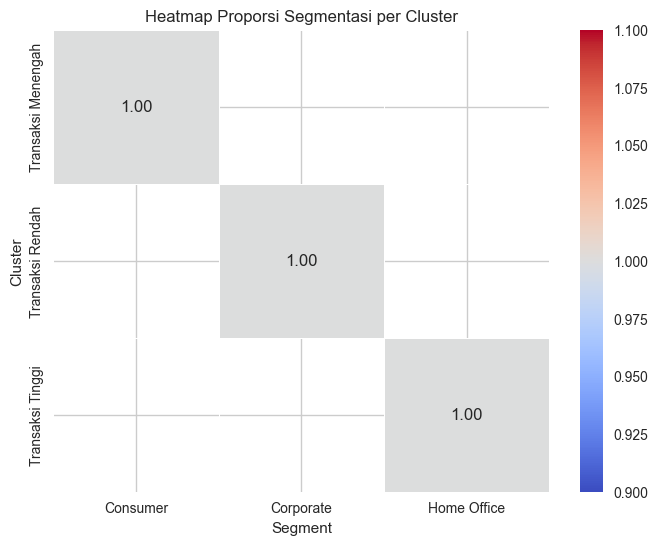

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(segment_counts, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Proporsi Segmentasi per Cluster")
plt.xlabel("Segment")
plt.ylabel("Cluster")
plt.show()

In [87]:
agg_numeric = superstore_clustering.groupby("Cluster_Label").agg({
    "Sales": ["min", "max", "mean",],
    "Quantity": ["min", "max", "mean",],
    "Discount": ["min", "max", "mean",],
    "Profit": ["min", "max", "mean",]
})

agg_categorical = superstore_clustering.groupby("Cluster_Label")["Segment"].agg(lambda x: x.mode()[0])

agg_result = pd.concat([agg_numeric, agg_categorical], axis=1)

agg_result

,"(Sales, min)","(Sales, max)","(Sales, mean)","(Quantity, min)","(Quantity, max)","(Quantity, mean)","(Discount, min)","(Discount, max)","(Discount, mean)","(Profit, min)","(Profit, max)","(Profit, mean)",Segment
Cluster_Label,,,,,,,,,,,,,
Transaksi Menengah,1.240,62.18,21.848773,1.0,7.0,3.011715,0.0,0.5,0.090909,-7.2672,19.2960,6.337333,Consumer
Transaksi Rendah,1.344,62.18,21.815998,1.0,7.0,3.048900,0.0,0.4,0.092747,-6.5400,19.3314,6.417641,Corporate
Transaksi Tinggi,0.990,61.96,21.224221,1.0,7.0,2.989233,0.0,0.4,0.081830,-7.3015,19.2556,6.373177,Home Office


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

### **Analisis Karakteristik Cluster dari Hasil KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

---

## **Cluster 0 (Transaksi Menengah)**  
- **Rata-rata Sales:** 21.85  
- **Rata-rata Quantity:** 3.01  
- **Rata-rata Discount:** 0.09  
- **Rata-rata Profit:** 6.34  
- **Segment:** Consumer

**Analisis:**  
Cluster ini mencakup pelanggan dengan transaksi menengah yang memiliki *Sales* dan *Profit* yang stabil. Mereka berasal dari segmen **Consumer**, dengan rata-rata *Quantity* yang lebih moderat. Diskon yang diberikan cenderung kecil, menunjukkan bahwa pelanggan dalam cluster ini lebih mengutamakan profitabilitas daripada diskon besar. Pembelian mereka tidak terlalu besar, tetapi cukup konsisten, menggambarkan pelanggan yang memiliki daya beli moderat dengan pembelian yang tidak terlalu sering mendapat diskon.

---

## **Cluster 1 (Transaksi Rendah)**  
- **Rata-rata Sales:** 21.82  
- **Rata-rata Quantity:** 3.05  
- **Rata-rata Discount:** 0.09  
- **Rata-rata Profit:** 6.42  
- **Segment:** Corporate

**Analisis:**  
Cluster ini menunjukkan pelanggan dengan transaksi yang lebih rendah dibandingkan klaster lainnya. Meskipun rata-rata *Sales* dan *Profit* hampir sama dengan cluster pertama, pelanggan dalam cluster ini berasal dari segmen **Corporate**, yang lebih cenderung melakukan pembelian dalam jumlah sedang dengan sedikit diskon. Pembelian ini konsisten, namun tidak mengandalkan diskon besar, melainkan lebih pada kebutuhan perusahaan yang membeli barang dalam jumlah tertentu.

---

## **Cluster 2 (Transaksi Tinggi)**  
- **Rata-rata Sales:** 21.22  
- **Rata-rata Quantity:** 2.99  
- **Rata-rata Discount:** 0.08  
- **Rata-rata Profit:** 6.37  
- **Segment:** Home Office

**Analisis:**  
Pelanggan dalam cluster ini memiliki transaksi yang lebih tinggi, meskipun rata-rata *Sales* dan *Profit* sedikit lebih rendah dibandingkan dengan klaster pertama dan kedua. Mereka berasal dari segmen **Home Office**, menunjukkan bahwa pelanggan ini cenderung melakukan pembelian dalam jumlah lebih besar dengan diskon yang lebih kecil. Hal ini dapat mencerminkan bahwa pelanggan di cluster ini memiliki daya beli lebih tinggi dan cenderung membeli produk dengan margin keuntungan yang lebih tinggi.

---

### **Kesimpulan**  
1. **Transaksi Menengah** (Consumer): Pembelian moderat, stabil, dengan fokus pada profitabilitas.  
2. **Transaksi Rendah** (Corporate): Pembelian lebih kecil namun konsisten dengan sedikit diskon.  
3. **Transaksi Tinggi** (Home Office): Pembelian besar dengan sedikit diskon, menunjukkan daya beli lebih tinggi.

### **Strategi Bisnis**:  
- **Consumer (Transaksi Menengah)**: Menawarkan promosi yang lebih sering dengan diskon kecil untuk menjaga loyalitas pelanggan.  
- **Corporate (Transaksi Rendah)**: Memberikan diskon eksklusif untuk volume pembelian tertentu, memperkuat hubungan jangka panjang.  
- **Home Office (Transaksi Tinggi)**: Menawarkan produk premium dengan sedikit diskon untuk mempertahankan pelanggan dengan daya beli tinggi.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [88]:
superstore_clustering.to_csv("inisiasi_superstore.csv", index=False)